In [1]:
import matplotlib.pyplot as plt

In [21]:
days=[1,2,3,4,5]
sleeping=[10,9,10,10,8]
eating=[2,4,3,2,3]
working=[6,8,9,0,7]
playing=[4,2,1,10,1]
labels = ["sleeping", "eating", "working","playing"]


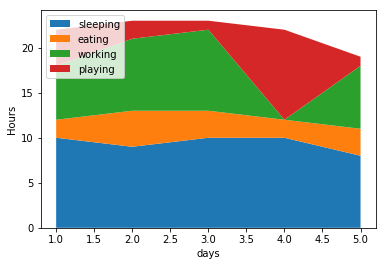

In [24]:
fig, ax = plt.subplots()
ax.stackplot(days,sleeping,eating,working,playing,labels=labels)
ax.legend(loc='upper left')
plt.xlabel("days")
plt.ylabel("Hours")
plt.show()

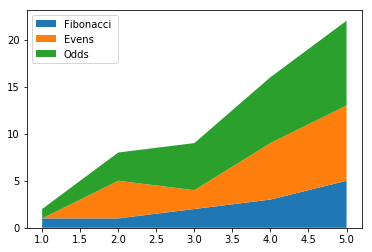

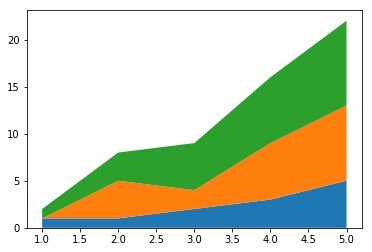

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y1 = [1, 1, 2, 3, 5]
y2 = [0, 4, 2, 6, 8]
y3 = [1, 3, 5, 7, 9]

y = np.vstack([y1, y2, y3])

labels = ["Fibonacci ", "Evens", "Odds"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, labels=labels)
ax.legend(loc='upper left')
plt.show()

fig, ax = plt.subplots()
ax.stackplot(x, y)
plt.show()